In [29]:
from torchvision import transforms as T
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torch
import torchvision

{'authentics': 0, 'counterfeits': 1}
[('data/id-documents-zone-1/authentics\\Carte 2 - Authentique délivrée par consulat - Carte ID FR - Zone 1.png', 0), ("data/id-documents-zone-1/authentics\\Carte 3 - Authentique - Carte ID FR - Delivre 01.2017 - Prefecture du Val d'oise (95) - Zone 1.png", 0), ('data/id-documents-zone-1/authentics\\Carte 4 - Authentique - Carte ID FR - Delivre 09.2009 - Prefecture de Thonon les bains (74) - Zone 1.png', 0), ('data/id-documents-zone-1/authentics\\Carte 5 - Authentique - Carte ID FR - Delivre 05.2019 - Prefecture de la Haute Savoie (74) - Zone 1.png', 0), ("data/id-documents-zone-1/authentics\\Carte 6 - Authentique - Carte ID FR - Delivre 11.2016 - Prefecture de l'Ain (01) - Zone 1.png", 0), ('data/id-documents-zone-1/authentics\\Carte 7 - Authentique - Carte ID FR - Delivre 03.2019- Prefecture de la Haute Savoie (74) - Zone 1 (après nouvelle calibration).png', 0), ('data/id-documents-zone-1/authentics\\Carte 8 - Authentique - Carte ID FR - Delivre 05

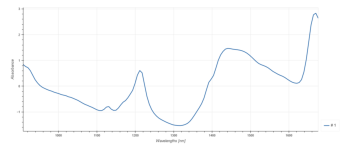

In [30]:
dataset = ImageFolder('data/id-documents-zone-1/')

#The picture in cat folder corresponds to label 0 and dog corresponds to 1
print(dataset.class_to_idx)

#Paths of all pictures and corresponding labels
print(dataset.imgs)

#There is no transform, so the PIL image object is returned
#Print (dataset [0] [1]) # the first dimension is the number of images, the second dimension is 1, and label is returned
#Print (dataset [0] [0]) # is 0 and returns picture data
plt.imshow(dataset[0][0])
plt.axis('off')
plt.show()

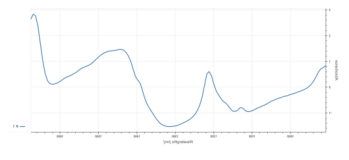

In [259]:
normalize = T.Normalize(mean=[0.4, 0.4, 0.4], std=[0.2, 0.2, 0.2])
transform = T.Compose([
     T.Resize(224),
     T.RandomHorizontalFlip(),
     T.ToTensor(),
     normalize,
])
dataset = ImageFolder('data/id-documents-zone-1/', transform=transform)

batch_size = 2
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

#In deep learning, the picture data is generally saved as cxhxw, that is, the number of channels x the picture height x the picture width
#print(dataset[0][0].size())

to_img = T.ToPILImage()
#0.2 and 0.4 are approximations of the standard deviation and mean
a=to_img(dataset[0][0]*0.2+0.4)
plt.imshow(a)
plt.axis('off')
plt.show()

In [260]:
# Define a Convolutional Neural Network, configuration, parametres

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(106000, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [261]:
# Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [262]:
# Network training

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [263]:
# Save the model
PATH = './fake_id_net.pth'
torch.save(net.state_dict(), PATH)

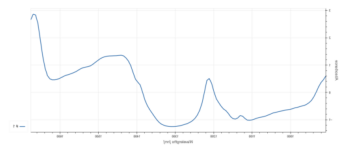

GroundTruth:  authentic


In [296]:
# Network test

dataiter = iter(testloader)
images, labels = dataiter.next()


# functions to show an image
def imshow(images):
    #img = img / 0.2+0.4     # unnormalize
    to_img = T.ToPILImage()
    img=to_img(images*0.2+0.4)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

classes = ('authentic', 'counterfeit')

# print images
for i in range(1):
    nextItem = next(dataiter)
    #print(nextItem)
    imshow(torchvision.utils.make_grid(images[1]))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:8s}' for j in range(1)))

In [298]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (len(test),
    100 * correct / total))

Accuracy of the network on the 3 test images: 55 %
